In [14]:
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append("..")
from utils import *
from features import *

In [15]:
def principal_components(X):
    """
    Returns the principal component vectors of the data, sorted in decreasing order
    of eigenvalue magnitude. This function first caluclates the covariance matrix
    and then finds its eigenvectors.

    Args:
        X - n x d NumPy array of n data points, each with d features

    Returns:
        d x d NumPy array whose columns are the principal component directions sorted
        in descending order by the amount of variation each direction (these are
        equivalent to the d eigenvectors of the covariance matrix sorted in descending
        order of eigenvalues, so the first column corresponds to the eigenvector with
        the largest eigenvalue
    """
    centered_data = center_data(X)  # first center data
    scatter_matrix = np.dot(centered_data.transpose(), centered_data)
    eigen_values, eigen_vectors = np.linalg.eig(scatter_matrix)
    # Re-order eigenvectors by eigenvalue magnitude:
    idx = eigen_values.argsort()[::-1]
    eigen_values = eigen_values[idx]
    eigen_vectors = eigen_vectors[:, idx]
    return eigen_vectors

In [16]:
def center_data(X):
    """
    Returns a centered version of the data, where each feature now has mean = 0

    Args:
        X - n x d NumPy array of n data points, each with d features

    Returns:
        n x d NumPy array X' where for each i = 1, ..., n and j = 1, ..., d:
        X'[i][j] = X[i][j] - means[j]
    """
    feature_means = X.mean(axis=0)
    return(X - feature_means)

In [17]:
train_x, train_y, test_x, test_y = get_MNIST_data()

In [19]:
n_components = 18
pcs = principal_components(train_x)
train_pca = project_onto_PC(train_x, pcs, n_components)
test_pca = project_onto_PC(test_x, pcs, n_components)

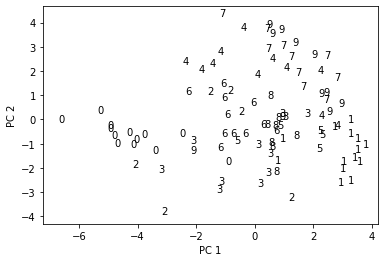

In [20]:
plot_PC(train_x[range(100), ], pcs, train_y[range(100)])

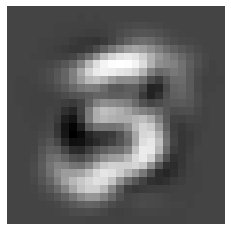

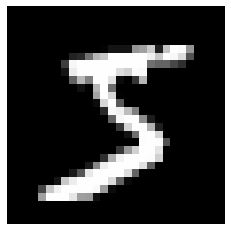

In [21]:
firstimage_reconstructed = reconstruct_PC(train_pca[0, ], pcs, n_components, train_x)
plot_images(firstimage_reconstructed)
plot_images(train_x[0, ])

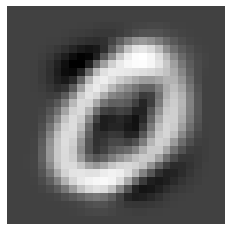

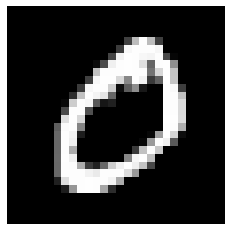

In [22]:
secondimage_reconstructed = reconstruct_PC(train_pca[1, ], pcs, n_components, train_x)
plot_images(secondimage_reconstructed)
plot_images(train_x[1, ])

In [23]:
train_cube = cubic_features(train_pca10)
test_cube = cubic_features(test_pca10)

NameError: name 'train_pca10' is not defined